In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
### Load dataset group information
df_group = pd.read_csv('./input/data_partition_small.txt', sep='\t')
df_group.index = df_group.data_group.to_list()
datasets = []; dgroup = dict();
for i in df_group.index:
    entries = df_group.data_entries[i].split(',')
    for e in entries:
        dgroup[e] = i
    datasets += entries

### Load kapp data
df_kapp = pd.read_excel('../parameterization/results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()
rxns = df_kapp.index.to_list()
df_kapp = df_kapp.loc[:, datasets]

In [3]:
### Compile kapp_max
df_kappmax = pd.DataFrame(index=rxns, columns=['id', 'kappmax (1/s)', 'dataset'])
df_kappmax['id'] = df_kappmax.index.to_list()
for rxn in rxns:
    kmax = df_kapp.loc[rxn, datasets].fillna(0).max()
    dmax = df_kapp.loc[rxn, datasets].fillna(0).idxmax()
    
    df_kappmax.loc[rxn, 'kappmax (1/s)'] = kmax
    df_kappmax.loc[rxn, 'dataset'] = dmax
    df_kappmax.loc[rxn, 'data_group'] = dgroup[dmax]
    
df_kappmax = df_kappmax[df_kappmax['kappmax (1/s)'] > 0]

In [4]:
### Compile kapp / kappmax
rxns = df_kapp.index.to_list()
groups = df_group.data_group.to_list()
df_ratio = pd.DataFrame(index=rxns, columns=['rxn'] + groups)
df_ratio['rxn'] = df_ratio.index.to_list()

for rxn in rxns:
    for group in groups:
        dsets = df_group.data_entries[group].split(',')
        kapps = [df_kapp.loc[rxn,d] for d in dsets if pd.isnull(df_kapp.loc[rxn,d]) == False]
        if kapps == []:
            continue
        else:
            kmax_within = max(kapps)
            kmax_across = df_kappmax.loc[rxn, 'kappmax (1/s)']
            df_ratio.loc[rxn, group] = kmax_within / kmax_across

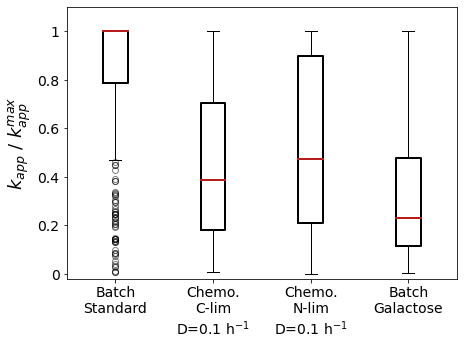

In [11]:
fig,ax = plt.subplots(figsize=(7,5))

w = 0.25
flierprops = {'marker': 'o', 'markersize': 1}
medianprops = dict(linestyle='-', linewidth=2, color='#b71c1c')
boxprops = dict(linestyle='-', linewidth=2)
whiskerprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='o', alpha=0.5)

for i in range(0, len(groups)):
    group = groups[i]
    vals = [v for v in df_ratio[group] if pd.isnull(v) == False]
    ax.boxplot(vals, positions=[i], widths=w, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           flierprops=flierprops);
    
ax.set_ylim(-0.02, 1.1);
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_yticks(yticks);
ax.set_yticklabels(yticks, fontsize=14);
ax.set_ylabel('$k_{app}$ $/$ $k_{app}^{max}$', fontsize=18)

xlabels = ['Batch\nStandard', 'Chemo.\nC-lim\nD=0.1 h$^{-1}$',
           'Chemo.\nN-lim\nD=0.1 h$^{-1}$', 'Batch\nGalactose']
xticks = range(0, len(xlabels))
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize=14);

In [ ]:
xlabels = ['Batch\nStandard', 'Chemo.\nC-lim\nD=0.1 h$^{-1}$',
           'Chemo.\nN-lim\nD=0.1 h$^{-1}$', 'Batch\nGalactose']

In [9]:
df_ratio[df_ratio.batch_std < 0.4]

,rxn,batch_std,chemo_lowC,chemo_lowN,batch_Gal
16GS_c_FWD,16GS_c_FWD,0.196991,0.385792,1.0,0.082516
3DSPHR_r_FWD,3DSPHR_r_FWD,0.213065,1.0,0.837864,NaN
3HACD200_rm_FWD,3HACD200_rm_FWD,0.144668,0.524957,1.0,NaN
3HACD220_rm_FWD,3HACD220_rm_FWD,0.144668,0.524957,1.0,NaN
3HACD240_rm_FWD,3HACD240_rm_FWD,0.144668,0.524957,1.0,NaN
3HACD260_rm_FWD,3HACD260_rm_FWD,0.144668,0.524957,1.0,NaN
3OACR200_rm_FWD,3OACR200_rm_FWD,0.247051,0.818922,1.0,0.12419
3OACR220_rm_FWD,3OACR220_rm_FWD,0.247051,0.818922,1.0,0.12419
3OACR240_rm_FWD,3OACR240_rm_FWD,0.247051,0.818922,1.0,0.12419
3OACR260_rm_FWD,3OACR260_rm_FWD,0.247051,0.818922,1.0,0.12419


In [30]:
df_ratio[df_ratio.chemo_highN < 0.1]

,rxn,batch_std,batch_rich,batch_anaero,chemo_lowC,chemo_highC,chemo_lowN,chemo_highN,batch_Gal,batch_Malt,batch_Tre
ADNK1_c_FWD,ADNK1_c_FWD,0.534348,1.0,0.329666,0.040559,0.036801,0.122716,0.075086,0.042344,0.059623,0.01426
ADSK_c_FWD,ADSK_c_FWD,0.040415,1.0,0.031719,0.010742,0.028247,0.011478,0.017289,0.014815,0.021152,0.005369
AHSERL2_c_FWD,AHSERL2_c_FWD,0.258475,1.0,0.115926,0.107438,0.167355,0.015983,0.042122,0.12288,0.210194,0.032706
ALCD2i2_c_FWD,ALCD2i2_c_FWD,1.0,0.110254,0.069047,NaN,0.329364,NaN,0.080938,NaN,NaN,0.002679
ARGSL_c_FWD,ARGSL_c_FWD,0.072955,0.009945,0.013235,1.0,0.035898,0.009234,0.047074,0.023525,0.033533,0.007398
ARGSS_c_FWD,ARGSS_c_FWD,0.147246,0.01962,0.079103,1.0,0.0791,0.011612,0.078219,0.050214,0.090981,0.011395
CBPS_c_FWD,CBPS_c_FWD,0.029426,0.048885,0.009778,1.0,0.031018,0.034546,0.065303,0.020444,0.022998,0.010134
FUM_c_FWD,FUM_c_FWD,1.0,0.101558,0.127401,0.182154,0.105804,0.013123,0.045017,0.020402,0.116428,0.010694
FUM_m_FWD,FUM_m_FWD,1.0,0.101558,0.127401,0.182154,0.105804,0.013123,0.045017,0.020402,0.116428,0.010694
G3PD1r_c_FWD,G3PD1r_c_FWD,0.720988,0.010177,1.0,0.005341,0.022624,0.008552,0.03049,0.053132,0.156327,0.001583


In [8]:
df_group = pd.read_csv('./input/data_partition.txt', sep='\t')
df_group.index = df_group.data_group.to_list()